In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [2]:
from keras.models import load_model
model_final= load_model('model_filter.h5')


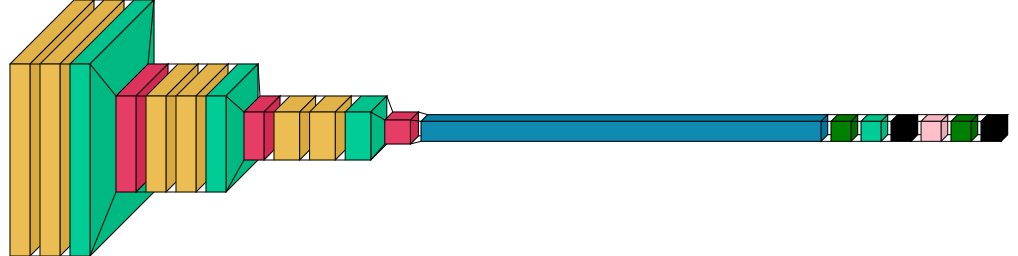

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from collections import defaultdict
import visualkeras

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = '#ebbd52'
color_map[Dropout]['fill'] = 'pink'
color_map[MaxPool2D]['fill'] = '#e53d65'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = '#118ab2'
color_map[BatchNormalization]['fill'] = '#00cc96'
color_map[Activation]['fill'] = 'black'

visualkeras.layered_view(model_final, color_map=color_map)

In [4]:
model_final.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        1664      
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 128)      

In [5]:
new_size=48
categories = ['anger', 'disgust', 'fear', 'happy', 'sadness', 'surprise', 'z']

#glioma=1, meningioma=2, no-tumor=0, pituitary=3

In [6]:
#--------------Test Images------------#
data_dir_test=('./ck/')
x_test=[]
y_test=[]

for i in categories:
    test_path = os.path.join(data_dir_test,i)
    for j in os.listdir(test_path):
        img = cv2.imread(os.path.join(test_path,j),cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(new_size,new_size))
        x_test.append(img)
        y_test.append(i)

In [7]:
x_test=np.array(x_test)
x_test=x_test/255.0
x_test=x_test.reshape(-1,new_size,new_size,1)
x_test.shape

(981, 48, 48, 1)

In [8]:
y_test=np.array(y_test)
y_test.shape

(981,)

In [9]:
y_test_new = []
for i in y_test:
    y_test_new.append(categories.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)


In [10]:
predictions = model_final.predict(x_test)
predicted_classes = np.argmax(predictions,axis=1)
print(predictions, predicted_classes)

In [ ]:
classes = {
    'TRAIN':['anger', 'contempt', 'disgust', 'fear','happy', 'sadness', 'surprise'],
    'TEST':['anger', 'contempt', 'disgust', 'fear','happy', 'sadness', 'surprise']}
for i in range(len(predicted_classes)):
     predicted_classNames = classes['TEST'][predicted_classes[i]]
     print("I think this image is among the {}.".format(predicted_classNames.lower()))

I think this image is among the anger.
I think this image is among the anger.
I think this image is among the anger.
I think this image is among the happy.
I think this image is among the happy.
I think this image is among the happy.
I think this image is among the anger.
I think this image is among the anger.
I think this image is among the anger.
I think this image is among the anger.
I think this image is among the anger.
I think this image is among the anger.
I think this image is among the disgust.
I think this image is among the disgust.
I think this image is among the disgust.
I think this image is among the surprise.
I think this image is among the anger.
I think this image is among the anger.
I think this image is among the anger.
I think this image is among the anger.
I think this image is among the anger.
I think this image is among the anger.
I think this image is among the anger.
I think this image is among the anger.
I think this image is among the anger.
I think this ima

In [ ]:
original_labels =[np.argmax(i) for i in y_test]
print(original_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [ ]:
! pip install -U scikit-learn

You should consider upgrading via the 'C:\Users\YASH\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(predicted_classes, original_labels)

print(report)

              precision    recall  f1-score   support

           0       0.61      0.41      0.49       201
           1       0.41      0.88      0.56        82
           2       0.24      0.35      0.28        52
           3       1.00      0.88      0.94       233
           4       0.60      0.53      0.56        95
           5       0.92      0.92      0.92       251
           6       0.65      0.52      0.58        67

    accuracy                           0.71       981
   macro avg       0.63      0.64      0.62       981
weighted avg       0.75      0.71      0.71       981



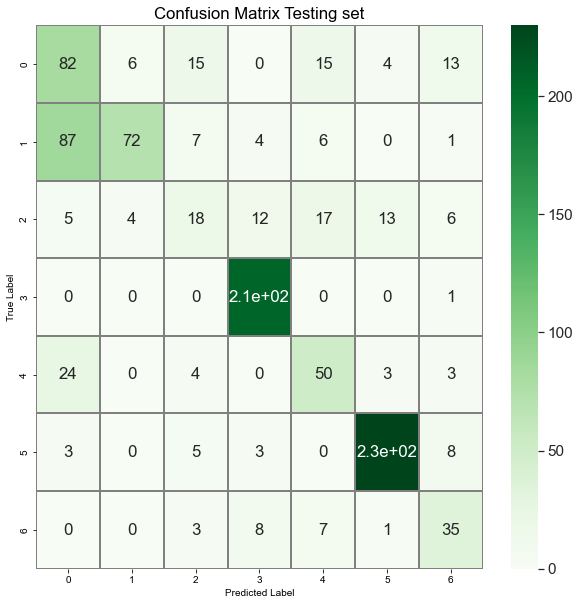

In [ ]:
from sklearn.metrics import confusion_matrix

f,ax = plt.subplots(figsize=(10, 10))
confusion_mtx2 = confusion_matrix(original_labels, predicted_classes)
sns.set(font_scale=1.4)
sns.heatmap(confusion_mtx2, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray",ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Testing set")
plt.show()

In [ ]:
#----------------------Custom Images----------------------------------------#
data_dir_custom=('./test')
x_test=[]
y_test=[]
test_path = os.path.join(data_dir_custom)
for j in os.listdir(test_path):
        img = cv2.imread(os.path.join(test_path,j),cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(new_size,new_size))
        x_test.append(img)
        y_test.append(3)


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
x_test=np.array(x_test)
x_test=x_test/255.0
x_test=x_test.reshape(-1,new_size,new_size,1)
x_test.shape

(5, 48, 48, 1)

In [ ]:
y_test=np.array(y_test)
y_test.shape

(5,)

In [ ]:
original_labels =[y_test[i] for i in y_test]
print(original_labels)

[3, 3, 3, 3, 3]


In [ ]:
predictions = model_final.predict(x_test)
predicted_classes = np.argmax(predictions,axis=1)
print(predictions, predicted_classes)

[[9.9758220e-01 3.7740504e-09 2.4126435e-03 6.7958020e-08 1.7889267e-06
  1.8583579e-08 3.2057287e-06]
 [2.0934258e-06 1.2256850e-11 1.2239863e-04 4.7036784e-07 9.9987507e-01
  1.2250910e-08 1.7656996e-08]
 [9.9758220e-01 3.7740504e-09 2.4126435e-03 6.7958020e-08 1.7889267e-06
  1.8583579e-08 3.2057287e-06]
 [9.9758220e-01 3.7740504e-09 2.4126435e-03 6.7958020e-08 1.7889267e-06
  1.8583579e-08 3.2057287e-06]
 [9.9758220e-01 3.7740504e-09 2.4126435e-03 6.7958020e-08 1.7889269e-06
  1.8583579e-08 3.2057285e-06]] [0 4 0 0 0]


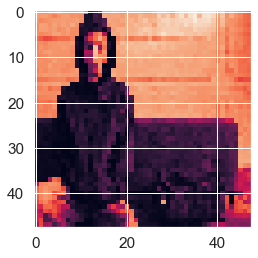

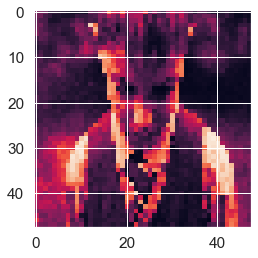

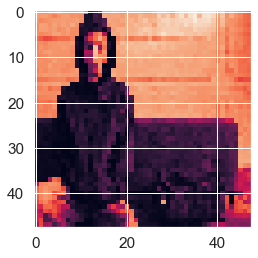

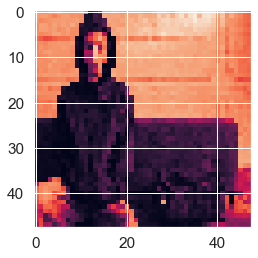

In [ ]:
for i in range(len(original_labels)-1):
    if predicted_classes[i]!=original_labels[i]:
        plt.imshow(x_test[i])
        plt.show()
    

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(predicted_classes, original_labels)

print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       4.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       1.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0



C:\Users\YASH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\YASH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\YASH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [ ]:
classes = {
    'TEST':['anger', 'disgust', 'fear', 'happy', 'sadness', 'surprise', 'z']}
for i in range(len(predicted_classes)):
     predicted_class = classes['TEST'][predicted_classes[i]]
     print("I think this image is among the {}.".format(predicted_class.lower()))

result = predicted_classes[0]

print(result)

I think this image is among the anger.
I think this image is among the sadness.
I think this image is among the anger.
I think this image is among the anger.
I think this image is among the anger.
0


In [ ]:
! pip install pickle
import pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
You should consider upgrading via the 'C:\Users\YASH\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
model_final.save('./test')

INFO:tensorflow:Assets written to: ./test\assets


In [ ]:
import tensorflowjs as tfjs

In [ ]:
tfjs.converters.save_keras_model(model_final, './model')